### SHARDUL DILIP KELAMBEKAR

**Data Science and Business Analytics Intern at The Sparks Foundation**

**Task2 : Prediction using Unsupervised ML**

#### Dataset : Iris.csv (https://bit.ly/3kXTdox)
#### Algorithm used here : K-Means Clustering

### Import Libraries 

In [2]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Load Dataset

In [3]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Arrange Data into Feature Matrix

In [5]:
features = ['PetalLengthCm','PetalWidthCm']

# Create features matrix
x = df.loc[:, features].values

In [6]:
x

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [8]:
df.Species=le.fit_transform(df.Species.values)
df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [9]:
df['Species'].unique()

array([0, 1, 2])

In [10]:
y=df.Species
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

### Standardize the data

In [11]:
x=StandardScaler().fit_transform(x)
x

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

### Plot data to estimate number of clusters

Text(0.5, 1.0, 'K-Means Clustering')

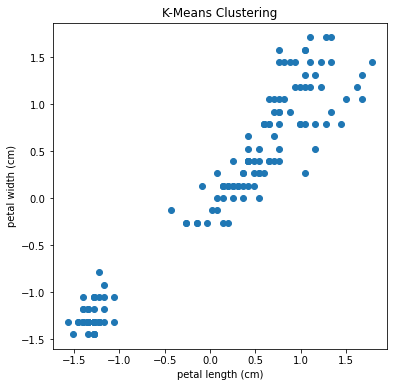

In [12]:
X=pd.DataFrame(x,columns=features)
plt.figure(figsize=(6,6))
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering')

### Finding the optimum number of clusters for K-means clustering

In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

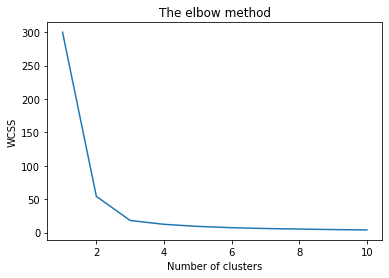

In [14]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### K-Means Clustering 

In [15]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

In [16]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [17]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
centroids

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

### Visually Evaluate the clusters

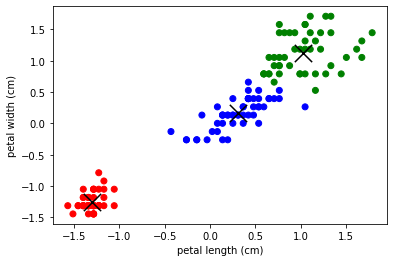

In [19]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

### Visually Evaluate the clusters and compare the species

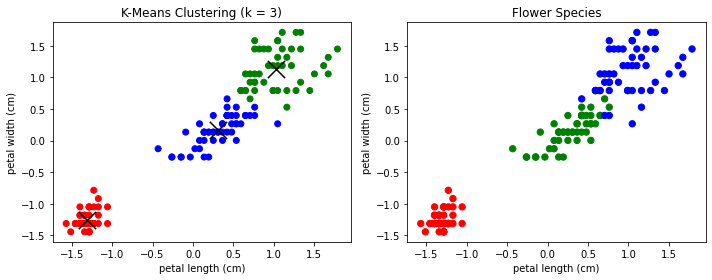

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colormap[y], s=40)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('Flower Species')


plt.tight_layout()


They look pretty similar. Looks like KMeans picked up flower differences with only two features and not the labels. The colors are different in the two graphs simply because KMeans gives out a arbitrary cluster number and the iris dataset has an arbitrary number in the target column.

### THANK YOU!!